In [43]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import cactas as C
import tensorflow as tf
import pickle

In [3]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'
CAPATH='/raid/mpsych/CACTAS/DATA/CA24'

In [4]:
images, labels = C.Helper.load_data(DATAPATH)

In [5]:
masks = C.Helper.load_seg_data(CAPATH)

In [6]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.split_patients_masks(images, labels, masks)

In [7]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.normalization2(DATAPATH, CAPATH, X_train, y_train, m_train, X_test, y_test, m_test)

In [8]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key_fulldata(y_train)

11156


In [9]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13561, 512, 512, 1) (13561, 512, 512, 1) (3205, 512, 512, 1) (3205, 512, 512, 1)


In [10]:
m_train, m_test = C.Helper.extract_masks_slices(m_train, m_test)

(13561, 512, 512, 1) (3205, 512, 512, 1)


In [11]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
m_train = m_train.astype(np.float32)
m_test = m_test.astype(np.float32)

In [12]:
train_images_array, test_images_array = C.Helper.masked_image(X_train, m_train, X_test, m_test)

(13561, 512, 512, 1) (3205, 512, 512, 1)


In [13]:
X_train_set = train_images_array[:last_key]
y_train_set = y_train[:last_key]
X_val = train_images_array[last_key:]
y_val = y_train[last_key:]

In [14]:
model = C.Helper.create_unet(X_train_set[0].shape)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


2025-05-22 20:23:01.094954: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2025-05-22 20:23:01.230606: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:87:00.0 name: NVIDIA A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.39GiB deviceMemoryBandwidth: 1.41TiB/s
2025-05-22 20:23:01.230649: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2025-05-22 20:23:01.274036: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2025-05-22 20:23:01.274073: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2025-05-22 20:23:01.290421: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.

In [15]:
model, history = C.Helper.train_unet(X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2025-05-22 20:23:03.873634: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2025-05-22 20:23:03.895527: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245775000 Hz


Epoch 1/200


2025-05-22 20:23:05.397023: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2025-05-22 20:23:06.457058: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2025-05-22 20:23:07.951806: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2025-05-22 20:23:07.951830: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2025-05-22 20:23:07.952663: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-05-22 20:23:08.031747: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2025-05-22 20:23:09.345146: I tensorflow/stream_exec

697/697 [==============================] - 327s 449ms/step - loss: 0.0852 - iou: 3.9676e-05 - iou_thresholded: 0.3343 - val_loss: 0.0029 - val_iou: 1.1624e-04 - val_iou_thresholded: 0.8874
Epoch 2/200
697/697 [==============================] - 314s 446ms/step - loss: 0.0014 - iou: 3.0907e-04 - iou_thresholded: 0.4568 - val_loss: 7.2033e-04 - val_iou: 3.7559e-04 - val_iou_thresholded: 0.8990
Epoch 3/200
697/697 [==============================] - 310s 445ms/step - loss: 6.2085e-04 - iou: 7.3978e-04 - iou_thresholded: 0.4572 - val_loss: 3.4996e-04 - val_iou: 8.0038e-04 - val_iou_thresholded: 0.9023
Epoch 4/200
697/697 [==============================] - 310s 445ms/step - loss: 2.5760e-04 - iou: 0.0016 - iou_thresholded: 0.4659 - val_loss: 1.9352e-04 - val_iou: 0.0017 - val_iou_thresholded: 0.8760
Epoch 5/200
697/697 [==============================] - 310s 445ms/step - loss: 1.6409e-04 - iou: 0.0035 - iou_thresholded: 0.4697 - val_loss: 1.4105e-04 - val_iou: 0.0025 - val_iou_thresholded: 0.

697/697 [==============================] - 310s 445ms/step - loss: 1.1665e-05 - iou: 0.3713 - iou_thresholded: 0.7050 - val_loss: 2.9115e-05 - val_iou: 0.5088 - val_iou_thresholded: 0.8249
Epoch 42/200
697/697 [==============================] - 310s 445ms/step - loss: 1.1988e-05 - iou: 0.3604 - iou_thresholded: 0.7110 - val_loss: 2.9465e-05 - val_iou: 0.3682 - val_iou_thresholded: 0.7999
Epoch 43/200
697/697 [==============================] - 310s 445ms/step - loss: 1.3584e-05 - iou: 0.3338 - iou_thresholded: 0.6854 - val_loss: 3.1093e-05 - val_iou: 0.4512 - val_iou_thresholded: 0.7867
Epoch 44/200
697/697 [==============================] - 310s 445ms/step - loss: 1.0441e-05 - iou: 0.3905 - iou_thresholded: 0.7401 - val_loss: 3.2753e-05 - val_iou: 0.4938 - val_iou_thresholded: 0.8491
Epoch 45/200
697/697 [==============================] - 310s 445ms/step - loss: 1.1962e-05 - iou: 0.3709 - iou_thresholded: 0.7190 - val_loss: 2.8147e-05 - val_iou: 0.4209 - val_iou_thresholded: 0.8261
Epo

Epoch 82/200
697/697 [==============================] - 310s 445ms/step - loss: 6.5544e-06 - iou: 0.5957 - iou_thresholded: 0.8451 - val_loss: 4.3728e-05 - val_iou: 0.4601 - val_iou_thresholded: 0.8202
Epoch 83/200
697/697 [==============================] - 310s 445ms/step - loss: 6.0913e-06 - iou: 0.5985 - iou_thresholded: 0.8523 - val_loss: 3.9243e-05 - val_iou: 0.5745 - val_iou_thresholded: 0.8274
Epoch 84/200
697/697 [==============================] - 310s 445ms/step - loss: 7.3594e-06 - iou: 0.5350 - iou_thresholded: 0.8043 - val_loss: 4.4758e-05 - val_iou: 0.5511 - val_iou_thresholded: 0.8573
Epoch 85/200
697/697 [==============================] - 310s 445ms/step - loss: 5.9291e-06 - iou: 0.6047 - iou_thresholded: 0.8507 - val_loss: 4.1097e-05 - val_iou: 0.6193 - val_iou_thresholded: 0.8580
Epoch 86/200
697/697 [==============================] - 310s 445ms/step - loss: 5.6249e-06 - iou: 0.6097 - iou_thresholded: 0.8437 - val_loss: 4.0896e-05 - val_iou: 0.5815 - val_iou_thresholde

697/697 [==============================] - 310s 445ms/step - loss: 3.7710e-06 - iou: 0.7017 - iou_thresholded: 0.8990 - val_loss: 6.1364e-05 - val_iou: 0.6275 - val_iou_thresholded: 0.7871
Epoch 123/200
697/697 [==============================] - 310s 445ms/step - loss: 3.8515e-06 - iou: 0.7461 - iou_thresholded: 0.8996 - val_loss: 5.9752e-05 - val_iou: 0.6128 - val_iou_thresholded: 0.7812
Epoch 124/200
697/697 [==============================] - 310s 445ms/step - loss: 3.9768e-06 - iou: 0.7194 - iou_thresholded: 0.9074 - val_loss: 6.0254e-05 - val_iou: 0.6636 - val_iou_thresholded: 0.8060
Epoch 125/200
697/697 [==============================] - 310s 445ms/step - loss: 5.8376e-06 - iou: 0.6474 - iou_thresholded: 0.8624 - val_loss: 4.3746e-05 - val_iou: 0.6319 - val_iou_thresholded: 0.8628
Epoch 126/200
697/697 [==============================] - 310s 445ms/step - loss: 4.5962e-06 - iou: 0.7015 - iou_thresholded: 0.9020 - val_loss: 4.7916e-05 - val_iou: 0.6246 - val_iou_thresholded: 0.8428

697/697 [==============================] - 310s 445ms/step - loss: 2.2547e-06 - iou: 0.8092 - iou_thresholded: 0.9422 - val_loss: 6.6180e-05 - val_iou: 0.6693 - val_iou_thresholded: 0.8334
Epoch 163/200
697/697 [==============================] - 310s 445ms/step - loss: 3.0312e-06 - iou: 0.7897 - iou_thresholded: 0.9468 - val_loss: 6.5712e-05 - val_iou: 0.5667 - val_iou_thresholded: 0.8338
Epoch 164/200
697/697 [==============================] - 310s 445ms/step - loss: 2.8242e-06 - iou: 0.7997 - iou_thresholded: 0.9557 - val_loss: 8.1263e-05 - val_iou: 0.5156 - val_iou_thresholded: 0.7840
Epoch 165/200
697/697 [==============================] - 310s 445ms/step - loss: 2.1154e-06 - iou: 0.7978 - iou_thresholded: 0.9582 - val_loss: 7.3430e-05 - val_iou: 0.6118 - val_iou_thresholded: 0.8061
Epoch 166/200
697/697 [==============================] - 310s 445ms/step - loss: 2.4534e-06 - iou: 0.8110 - iou_thresholded: 0.9601 - val_loss: 8.2145e-05 - val_iou: 0.6032 - val_iou_thresholded: 0.7908

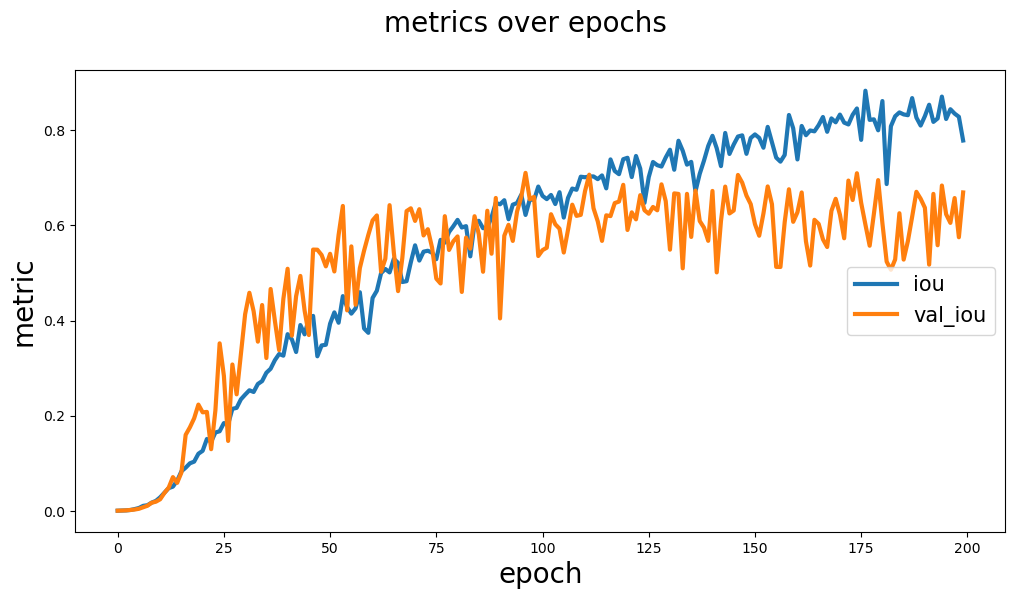

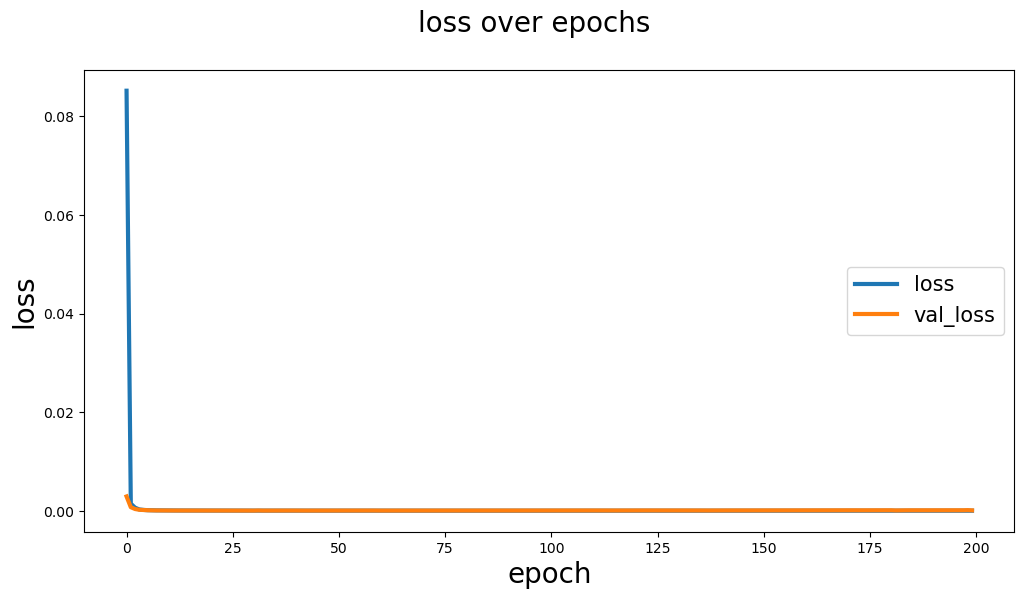

In [16]:
C.Helper.visualize_graph(history)

In [17]:
y_pred = C.Helper.prediction(test_images_array, model)

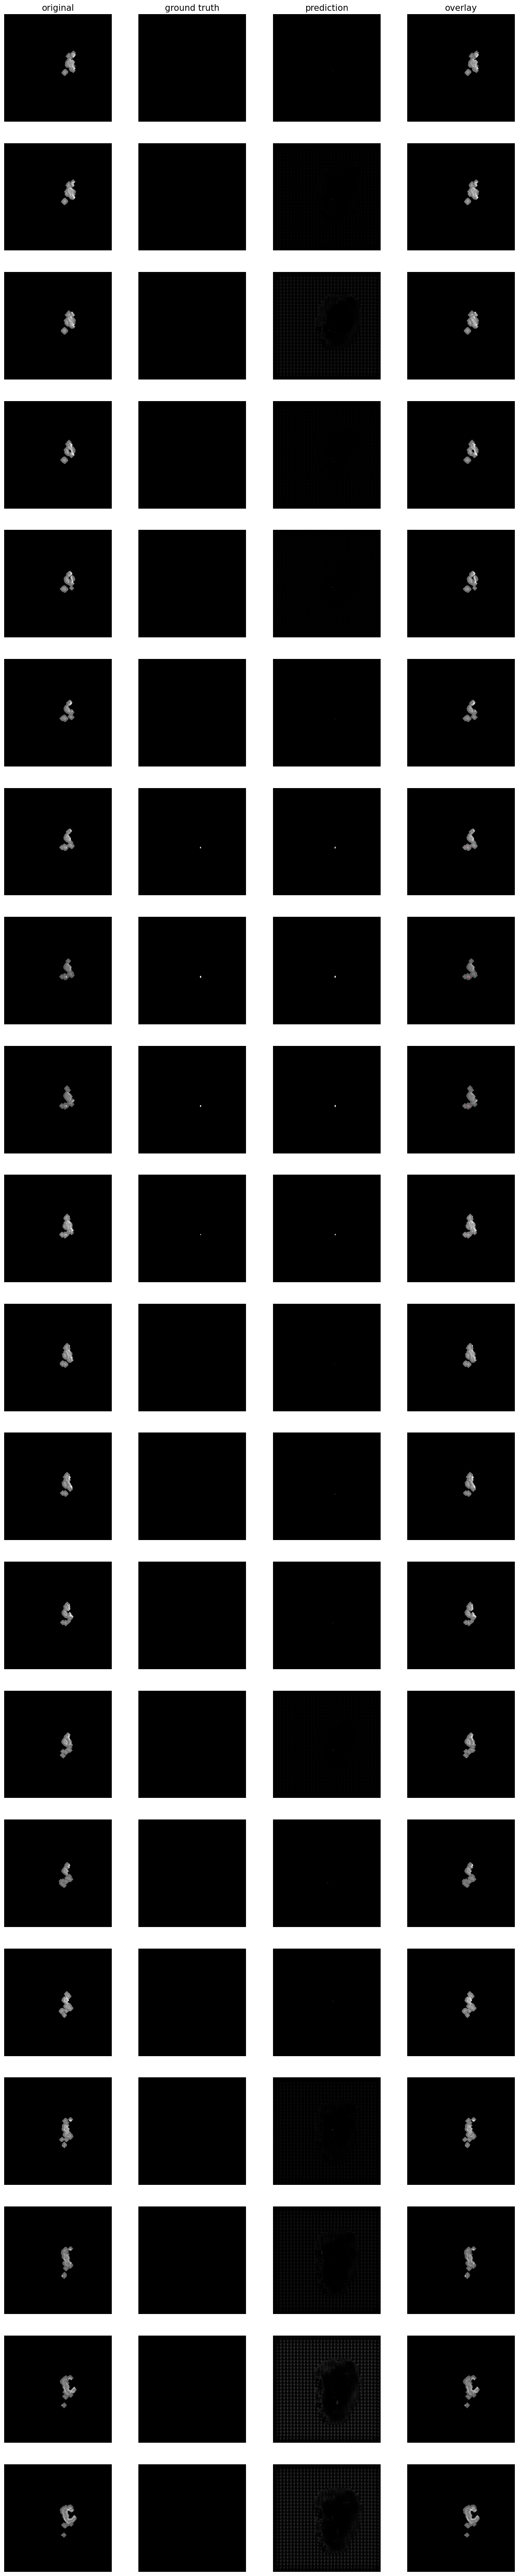

In [31]:
C.Helper.visualize_result_limit(test_images_array, y_test, y_pred, start_index=100, end_index=120)

In [20]:
C.Helper.evaluate(test_images_array, y_test, model)

101/101 [==============================] - 26s 258ms/step - loss: 9.3315e-05 - iou: 0.5658 - iou_thresholded: 0.7791


(9.331484034191817e-05, 0.5657703876495361, 0.7790501117706299)

In [21]:
a_binary = C.Helper.threshold(y_pred,t_val = 0.5)

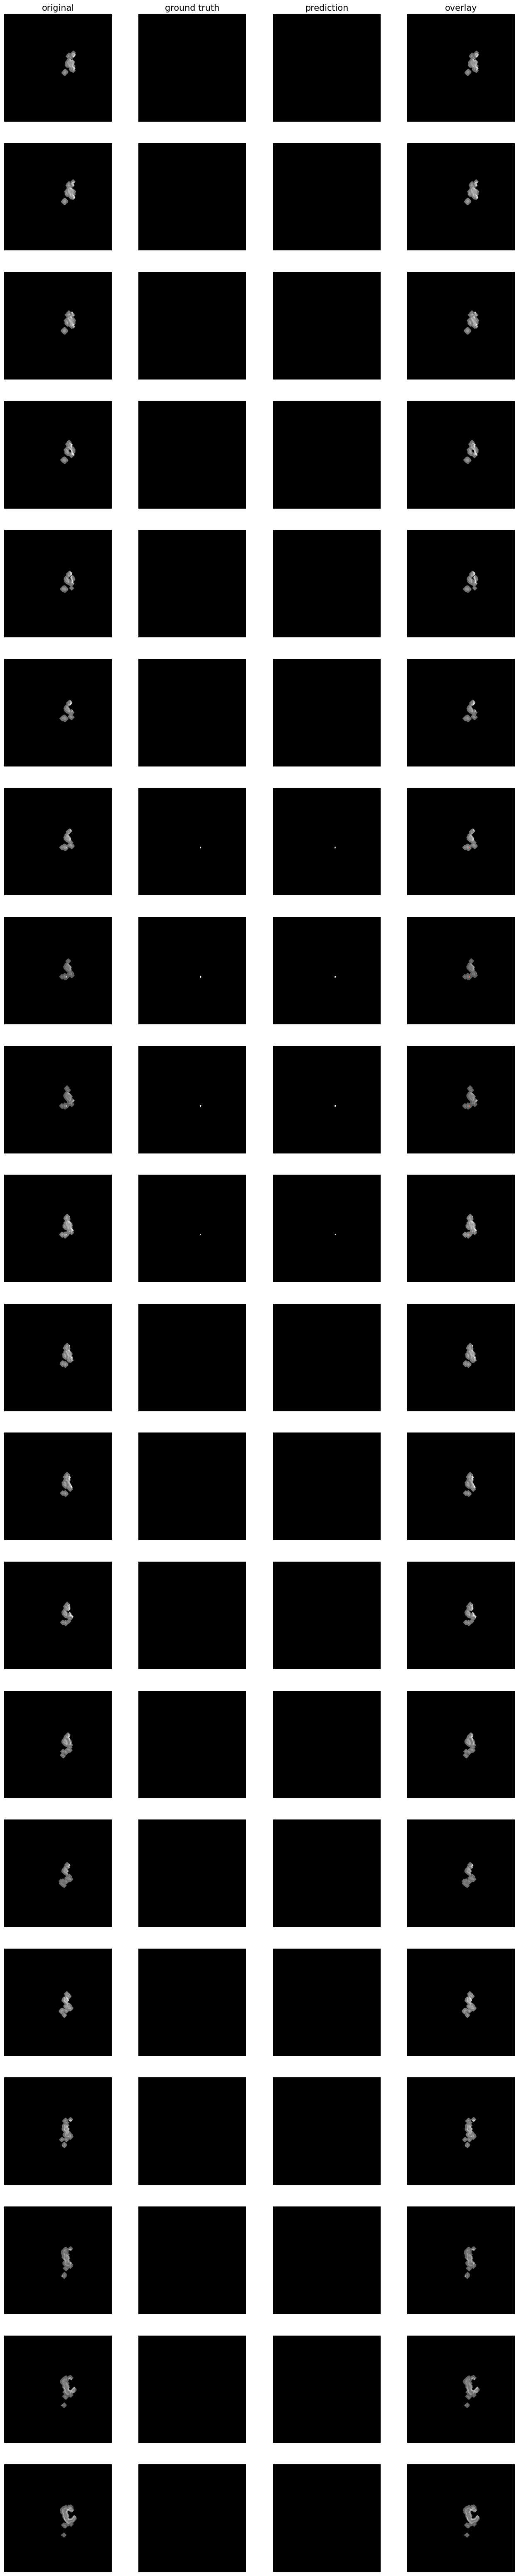

In [32]:
C.Helper.visualize_result_limit(test_images_array, y_test, a_binary, start_index=100, end_index=120)

In [23]:
C.Helper.evaluate(test_images_array, a_binary, model)

101/101 [==============================] - 26s 259ms/step - loss: 6.7141e-07 - iou: 0.7150 - iou_thresholded: 1.0000


(6.714060418744339e-07, 0.7150173187255859, 1.0)

In [ ]:
# find appropreate threshold values

In [ ]:
thresholds = np.linspace(0.1, 0.5, 5)
ious_by_threshold = {}

valid_indices = [i for i in range(len(y_test)) if np.sum(y_test[i]) > 0]

for t in thresholds:
    ious = []
    for i in valid_indices:
        pred = (prediction_mean[i] > t).astype(np.uint8)
        gt = y_test[i]
        intersection = np.sum(np.logical_and(gt, pred))
        union = np.sum(np.logical_or(gt, pred))
        iou = intersection / union if union != 0 else 0
        ious.append(iou)
    ious_by_threshold[t] = np.mean(ious)

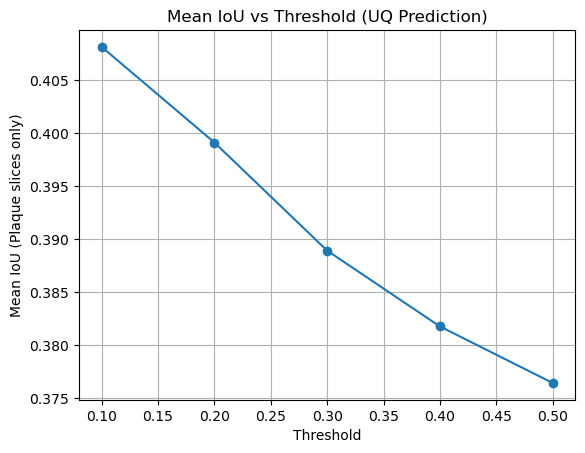

In [63]:
import matplotlib.pyplot as plt
plt.plot(list(ious_by_threshold.keys()), list(ious_by_threshold.values()), marker='o')
plt.xlabel('Threshold')
plt.ylabel('Mean IoU (Plaque slices only)')
plt.title('Mean IoU vs Threshold (UQ Prediction)')
plt.grid(True)
plt.show()

In [ ]:
# Based on this table, i choose "threshold = 0.1"

In [ ]:
###### UQ test with mask

In [55]:
# 1. Run MC Dropout
prediction_mean, prediction_variance = C.Helper.predict_uncertainty(model, test_images_array, n_iter=10)

In [57]:
# 2. Apply carotid artery mask
masked_prediction_mean = prediction_mean * m_test
masked_prediction_variance = prediction_variance * m_test

In [58]:
# 3. Compute ECE on masked prediction
ece_score = C.Helper.ece(masked_prediction_mean.flatten(), y_test.flatten())
print("ECE (masked):", ece_score)

ECE (masked): 0.006548938627146359


In [59]:
# 4. Compute mean IoU and thresholded IoU over all slices
iou_mean, iou_thresh_mean = C.Helper.evaluate_prediction_mean(masked_prediction_mean, y_test)
print("Mean IoU (masked):", iou_mean)
print("Mean IoU (thresholded, masked):", iou_thresh_mean)

Mean IoU (masked): 0.0010421405367298632
Mean IoU (thresholded, masked): 0.01926121750297994


In [60]:
# 5. Compute IoU only on slices with plaque
y_pred_thresh = (masked_prediction_mean > 0.5).astype(np.uint8)
valid_indices = [i for i in range(len(y_test)) if np.sum(y_test[i]) > 0]

ious = []
for i in valid_indices:
    try:
        iou = jaccard_score(y_test[i].flatten(), y_pred_thresh[i].flatten())
        ious.append(iou)
    except:
        pass

print("Mean IoU on slices with plaque (masked):", np.mean(ious))

Mean IoU on slices with plaque (masked): 0.3764158664454312


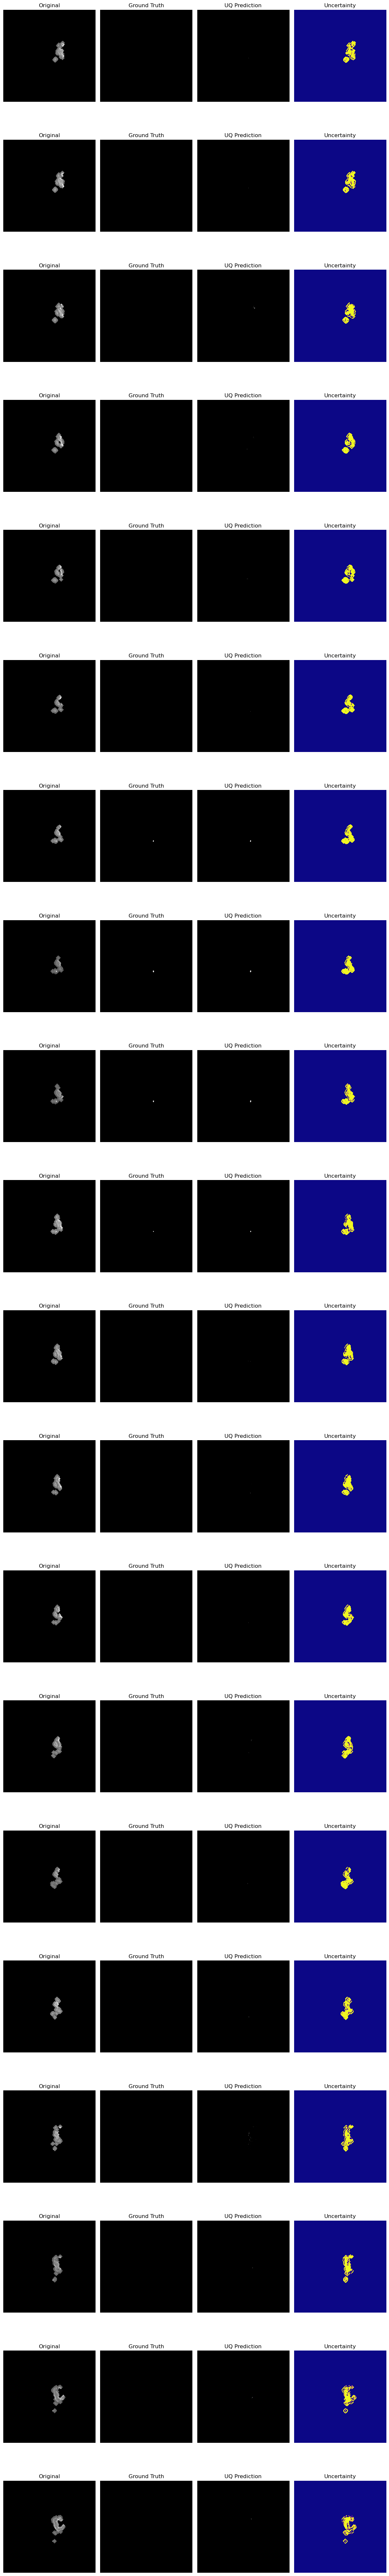

In [61]:
# 6. Visualization
C.Helper.visualize_uncertainty(test_images_array, y_test, masked_prediction_mean, masked_prediction_variance, start_index=100, end_index=120)

In [ ]:
# recalculate ECE for the labeled slices only

In [76]:
ece_value = ece_foreground_only(prediction_mean, y_test)
print("ECE (foreground only):", ece_value)

ECE (foreground only): 0.03747712444874983


In [ ]:
##### UQ increase n_iter=20

In [78]:
prediction_mean, prediction_variance = predict_uncertainty_memory_safe(model, test_images_array, n_iter=20)

In [79]:
masked_prediction_mean = prediction_mean * m_test
masked_prediction_variance = prediction_variance * m_test

In [80]:
# 3. Compute ECE on masked prediction
ece_score = C.Helper.ece(masked_prediction_mean.flatten(), y_test.flatten())
print("ECE (masked):", ece_score)

ECE (masked): 0.0065488807591951815


In [82]:
# 4. Compute mean IoU and thresholded IoU over all slices
iou_mean5, iou_thresh_mean5 = C.Helper.evaluate_prediction_mean(masked_prediction_mean, y_test)
print("Mean IoU (masked):", iou_mean5)
print("Mean IoU (0.5 thresholded, masked):", iou_thresh_mean5)

Mean IoU (masked): 0.0010421369947499475
Mean IoU (0.5 thresholded, masked): 0.019350811718640858


In [83]:
# Compute mean IoU and thresholded IoU over labeled slices
iou_mean6, iou_thresh_mean6 = evaluate_prediction_mean(masked_prediction_mean, y_test, threshold=0.1)

In [84]:
print("Mean IoU (masked):", iou_mean6)
print("Mean IoU (0.1 thresholded, masked):", iou_thresh_mean6)

Mean IoU (masked): 0.02036615285471696
Mean IoU (0.1 thresholded, masked): 0.41450823381059243


In [85]:
thresholded_pred = (masked_prediction_mean > 0.1).astype(np.uint8)

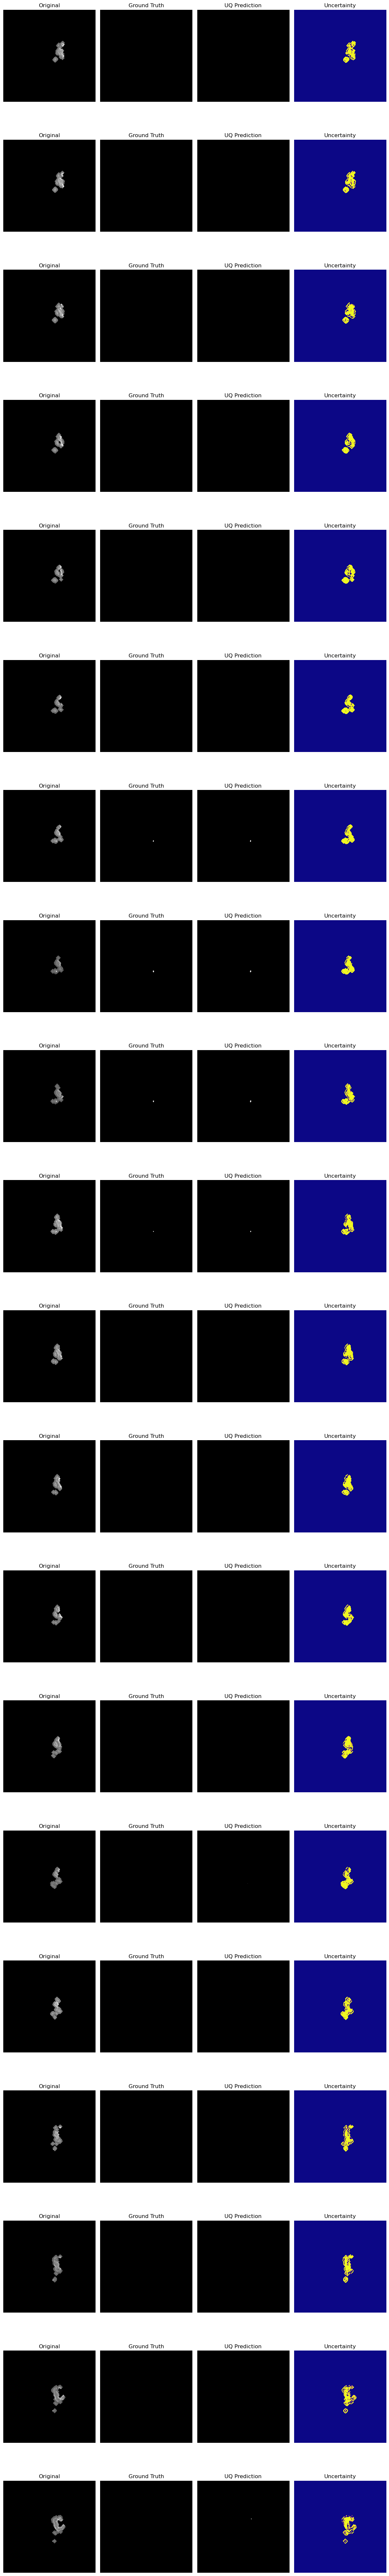

In [87]:
C.Helper.visualize_uncertainty(test_images_array, y_test, thresholded_pred, masked_prediction_variance, start_index=100, end_index=120)